In [15]:
%matplotlib inline
import galpy
import numpy as np
import scipy as sp
from matplotlib.pylab import plt, xlim, ylim
from astropy import units as u

from galpy.df import streamdf
from galpy.orbit import Orbit
from galpy.potential import MWPotential2014, ChandrasekharDynamicalFrictionForce
from galpy.actionAngle import actionAngleIsochroneApprox, estimateBIsochrone
from galpy.util import coords #for unit conversions

In [2]:
#Parameter Block
#Galaxy Properties
sigv_Leo = 9.2 #km/s
mw = MWPotential2014 

#Orbits
orb_coarse = Orbit.from_name('Leo I')
orb_fine = Orbit.from_name('Leo I')

#Times
ts_coarse = np.linspace(0,-10,1001)*u.Gyr #every 100Myr
ts_fine = np.linspace(0,-10,100001)*u.Gyr #every Myr

In [3]:
#Integrate Orbits
orb_coarse.integrate(ts_coarse, mw)
orb_fine.integrate(ts_fine, mw)

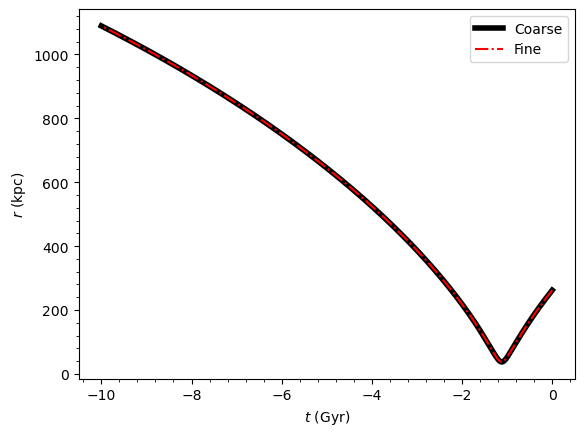

In [4]:
orb_coarse.plot(d1='t',d2='r', color="k", linewidth=4, label='Coarse')
orb_fine.plot(d1='t',d2='r', color="r", linestyle="dashdot", overplot=True,label='Fine')
plt.legend()

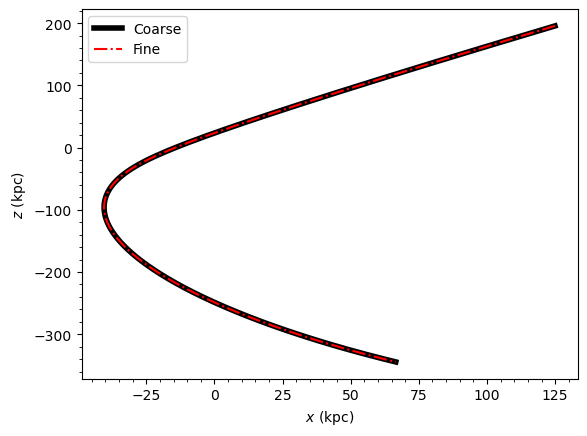

In [5]:
orb_coarse.plot(d1='x',d2='z', color="k", linewidth=4, label='Coarse')
orb_fine.plot(d1='x',d2='z', color="r", linestyle="dashdot", overplot=True,label='Fine')
plt.legend()

In [6]:
#Check for dynamical friction for heavy galaxy
pastmass = 7.*10.**9*u.Msun
halfmass_radius = 0.370*u.kpc #Sersic radius 
cdf = ChandrasekharDynamicalFrictionForce(GMs=pastmass,rhm=halfmass_radius,
                                             dens=MWPotential2014)
orb_fine.integrate(ts_fine, mw+cdf)

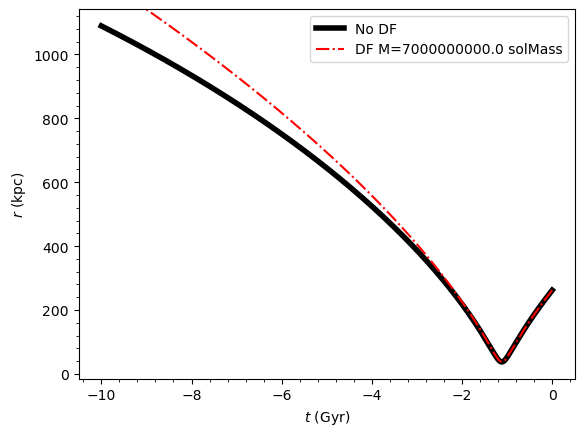

In [7]:
orb_coarse.plot(d1='t',d2='r', color="k", linewidth=4, label=r'No DF')
orb_fine.plot(d1='t',d2='r', color="r", linestyle="dashdot",
              overplot=True,label=f'DF M={pastmass}')
plt.legend()

In [8]:
tidal_rad = [170,180]
times = []
print(ts_coarse)
for t in ts_coarse:
#    print(orb_coarse.dist(t))
    if orb_coarse.dist(t) > tidal_rad[0]:
        if orb_coarse.dist(t) < tidal_rad[1]:
            times.append(t)
print(times)

[  0.    -0.01  -0.02 ...  -9.98  -9.99 -10.  ] Gyr
[<Quantity -0.42 Gyr>, <Quantity -0.43 Gyr>, <Quantity -0.44 Gyr>, <Quantity -0.45 Gyr>, <Quantity -0.46 Gyr>, <Quantity -1.75 Gyr>, <Quantity -1.76 Gyr>, <Quantity -1.77 Gyr>, <Quantity -1.78 Gyr>, <Quantity -1.79 Gyr>]


In [21]:
t_init = -4. *u.Gyr
pos_past = [orb_coarse.x(t_init), orb_coarse.y(t_init), orb_coarse.z(t_init)]
vel_past = [orb_coarse.U(t_init), orb_coarse.V(t_init), orb_coarse.W(t_init)]
vel_past_gal = [orb_coarse.vx(t_init), orb_coarse.vy(t_init), orb_coarse.vz(t_init)]

In [29]:
print(f"{pos_past}\n{vel_past}\n{vel_past_gal}")

[-15.632778337113093, 478.84073839934547, -214.17119134859274]
[2.3984809525699626, -354.2742679983597, 26.89853714462909]
[-13.568039406535364, -122.03430973762137, 34.14169423063725]


In [26]:
xpast_galcen = coords.XYZ_to_galcenrect(pos_past[0], pos_past[1], pos_past[2])
print(xpast_galcen)
vpast_galcen = coords.vxvyvz_to_galcenrect(vel_past[0], vel_past[1], vel_past[2])
print(vpast_galcen)

(16.632026350795485, 478.84106751604526, -214.17051040072133)
(-2.398112895927818, -353.2743097376214, 26.898020217939546)
